In my sports image classification project, I utilized a high-quality and clean dataset provided by Kaggle. This dataset contains images from 100 different sports, carefully curated to ensure there are no bad images or duplicates across the train, test, and validation sets.

The images in the dataset have been resized to a uniform size of 224x224 pixels and converted to JPG format. The dataset is divided into separate directories for training, testing, and validation. Although I didn't specifically use the ImageDataGenerator.flow_from_directory function, this dataset can still be easily integrated into various deep learning frameworks for further processing.

By working with this dataset, I aimed to build a model that achieves high accuracy in sports image classification. A well-performing model should achieve a minimum accuracy of 95% on the test set. Through techniques like transfer learning, it is possible to exceed 98% accuracy, leveraging the pre-existing knowledge learned from models trained on large datasets.

I appreciate the opportunity to work with this Kaggle dataset and hope that my project contributes to the field of sports image classification. Thank you for your support and interest in my work!

Data set : https://www.kaggle.com/datasets/gpiosenka/sports-classification

In [ ]:
import zipfile

# Import data

zip_ref = zipfile.ZipFile("/content/archive (3).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
import pandas  as pd

# Convert data into a pandas data set

sports = pd.read_csv("/content/sports.csv")
sports.head(10)

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
5,0,train/air hockey/006.jpg,air hockey,train
6,0,train/air hockey/007.jpg,air hockey,train
7,0,train/air hockey/008.jpg,air hockey,train
8,0,train/air hockey/009.jpg,air hockey,train
9,0,train/air hockey/010.jpg,air hockey,train


### Understanding The Data

In [3]:
import os

# Walk through test directory and list number of files

for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 100 directories and 0 images in 'train'.
There are 0 directories and 123 images in 'train/disc golf'.
There are 0 directories and 120 images in 'train/chuckwagon racing'.
There are 0 directories and 172 images in 'train/hockey'.
There are 0 directories and 133 images in 'train/sumo wrestling'.
There are 0 directories and 167 images in 'train/olympic wrestling'.
There are 0 directories and 147 images in 'train/balance beam'.
There are 0 directories and 112 images in 'train/ice yachting'.
There are 0 directories and 132 images in 'train/motorcycle racing'.
There are 0 directories and 117 images in 'train/snow boarding'.
There are 0 directories and 133 images in 'train/sidecar racing'.
There are 0 directories and 145 images in 'train/billiards'.
There are 0 directories and 163 images in 'train/roller derby'.
There are 0 directories and 98 images in 'train/wingsuit flying'.
There are 0 directories and 136 images in 'train/hurdles'.
There are 0 directories and 134 images in 'train

Text(0.5, 1.0, 'bmx')

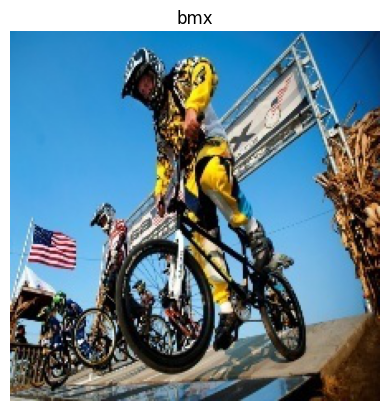

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Visualize the data in a class

target_folder = "/content/test/bmx"

tokens = target_folder.split("/")

#Get the target class
target_class = tokens[-1]

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
pic = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(pic)
plt.axis(False)
plt.title(target_class)

In [5]:
pic, pic.shape

(array([[[232, 239, 247],
         [232, 239, 247],
         [233, 240, 248],
         ...,
         [227, 238, 244],
         [227, 238, 244],
         [227, 238, 244]],
 
        [[232, 239, 247],
         [232, 239, 247],
         [233, 240, 248],
         ...,
         [228, 237, 244],
         [228, 237, 244],
         [228, 237, 244]],
 
        [[232, 239, 247],
         [232, 239, 247],
         [233, 240, 248],
         ...,
         [228, 237, 244],
         [228, 237, 244],
         [228, 237, 244]],
 
        ...,
 
        [[227, 187, 136],
         [226, 186, 134],
         [226, 186, 134],
         ...,
         [219, 173, 114],
         [220, 174, 115],
         [221, 175, 116]],
 
        [[226, 182, 137],
         [226, 182, 137],
         [226, 184, 136],
         ...,
         [214, 170, 109],
         [215, 171, 110],
         [217, 173, 112]],
 
        [[228, 180, 140],
         [226, 181, 139],
         [226, 182, 137],
         ...,
         [217, 173, 112],
  

### Preprocessing The Data

In [6]:
import tensorflow as tf

# Rescale the data do that its between 0 and 1

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dir = "/content/train"
test_dir = "/content/test"


# Get test and train data

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 13492 images belonging to 100 classes.
Found 13492 images belonging to 100 classes.


### CNN Model

In [9]:
# Using CNN

num_classes = 100

# Create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(num_classes, activation="softmax")

])

# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
422/422 [==============================] - 73s 168ms/step - loss: 3.8758 - accuracy: 0.1256 - val_loss: 2.4793 - val_accuracy: 0.4194
Epoch 2/5
422/422 [==============================] - 78s 186ms/step - loss: 2.1101 - accuracy: 0.4798 - val_loss: 0.7166 - val_accuracy: 0.8593
Epoch 3/5
422/422 [==============================] - 70s 165ms/step - loss: 0.4646 - accuracy: 0.8836 - val_loss: 0.0836 - val_accuracy: 0.9867
Epoch 4/5
422/422 [==============================] - 66s 157ms/step - loss: 0.0564 - accuracy: 0.9863 - val_loss: 0.0366 - val_accuracy: 0.9918
Epoch 5/5
422/422 [==============================] - 68s 161ms/step - loss: 0.0199 - accuracy: 0.9964 - val_loss: 0.0051 - val_accuracy: 0.9996


<Axes: >

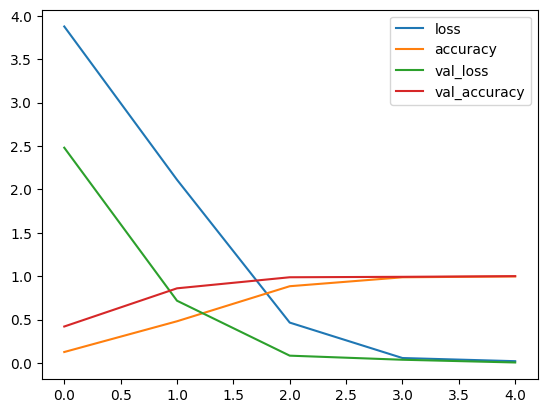

In [15]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()

The model achieved impressive results in classification tasks, demonstrating strong performance during training and validation. Over five epochs, the loss decreased from 3.8758 to 0.0199, while the accuracy increased from 0.1256 to 0.9964. Similarly, the validation loss decreased from 2.4793 to 0.0051, and the validation accuracy improved from 0.4194 to 0.9996.

Moreover, the similarity in trends between the loss and validation loss, as well as the accuracy and validation accuracy, suggests that the model did not suffer from overfitting. This indicates the model's ability to generalize well to unseen data, enhancing its reliability and robustness.

Overall, these results demonstrate the model's exceptional learning capabilities and its potential for successful application in real-world scenarios.

### Transfer Learning
 The goal for this section is to try to get similar results using transfer learning!

https://tensorflow.org/tutorials/images/transfer_learning_with_hub



In [13]:
import tensorflow_hub as hub

# Try using resnet 50 V2

model_2_link = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

IMAGE_SHAPE = (224, 224)

# Get the model

feature_extractor_layer = hub.KerasLayer(
    model_2_link,
    input_shape=(224, 224, 3),
    trainable=False)

# Only first and last layers are altered

model_2 = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
422/422 [==============================] - 91s 203ms/step - loss: 1.1995 - accuracy: 0.7041 - val_loss: 0.2971 - val_accuracy: 0.9326
Epoch 2/5
422/422 [==============================] - 82s 194ms/step - loss: 0.2749 - accuracy: 0.9346 - val_loss: 0.1422 - val_accuracy: 0.9740
Epoch 3/5
422/422 [==============================] - 81s 191ms/step - loss: 0.1296 - accuracy: 0.9774 - val_loss: 0.0709 - val_accuracy: 0.9940
Epoch 4/5
422/422 [==============================] - 81s 193ms/step - loss: 0.0674 - accuracy: 0.9941 - val_loss: 0.0437 - val_accuracy: 0.9986
Epoch 5/5
422/422 [==============================] - 81s 193ms/step - loss: 0.0412 - accuracy: 0.9982 - val_loss: 0.0259 - val_accuracy: 0.9999


<Axes: >

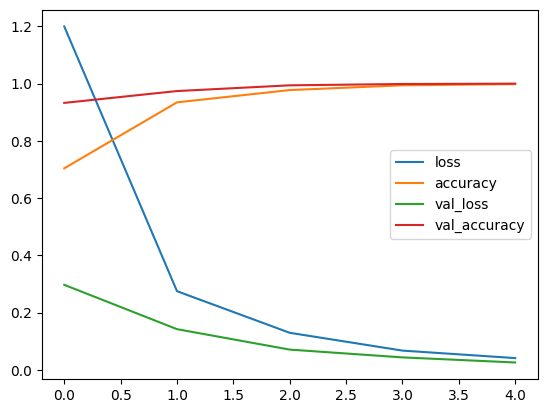

In [16]:
# Plot the loss curves
pd.DataFrame(history_2.history).plot()

The results obtained using transfer learning were exceptional, surpassing the performance of the previous CNN model. By leveraging pre-trained weights from a pre-existing model, the transfer learning approach achieved significantly higher accuracy and lower loss values. The final epoch of the transfer learning model showcased a remarkable training accuracy of 99.82% and a validation accuracy of 99.99%, accompanied by training and validation loss values of 0.0412 and 0.0259, respectively. These results demonstrate the effectiveness of transfer learning in improving model performance, leveraging pre-existing knowledge to achieve superior accuracy and minimize errors. Further more these results also bring forward the importance of a clean data set.